# Class 21: K-Means Clustering

### Objective:
By the end of this lesson, we will understand K-Means clustering, how to choose the number of clusters, and how to apply K-Means to real-life data.

# 1. Understanding K-Means Clustering

## What is K-Means Clustering?
K-Means is a way to group data into "clusters."

### Simple Example:
- Imagine you have different colored marbles mixed together.
- You don’t know how many colors there are.
- K-Means helps you separate these marbles into jars based on their colors (groups).

### Important Words:
- **Centroid**: The center point of a group.
- **Iteration**: Repeating steps to make the groups better.
- **Convergence**: When the groups stop changing.

### Steps in K-Means:
1. Pick the number of groups (k).
2. Choose starting points (centroids).
3. Assign each marble to the closest jar.
4. Move the jar’s center to the middle of the marbles.
5. Repeat until the groups stop changing.

# 2. Choosing the Number of Clusters (Elbow Method)

### How do we know how many groups (k) to make?

The **Elbow Method** helps us find the best number of groups.

### Steps:
1. Try different k values (1 to 10).
2. Measure how close the marbles are to their jar’s center. (This is called WCSS)
3. Plot k vs. WCSS.
4. Where the graph bends like an "elbow," that’s the best k.

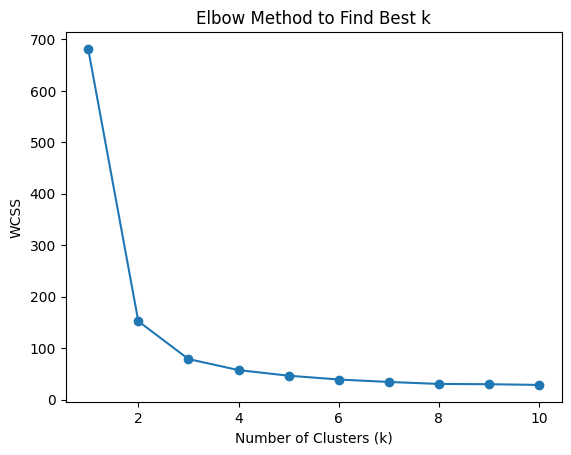

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load a flower dataset
data = load_iris()
X = data.data

# Calculate WCSS for k from 1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
 
# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Find Best k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

<Axes: >

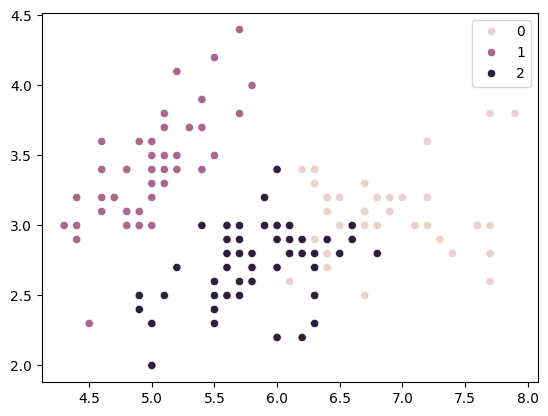

In [2]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

sns.scatterplot(x=X[:,0], y=X[:,1], hue= y_kmeans)

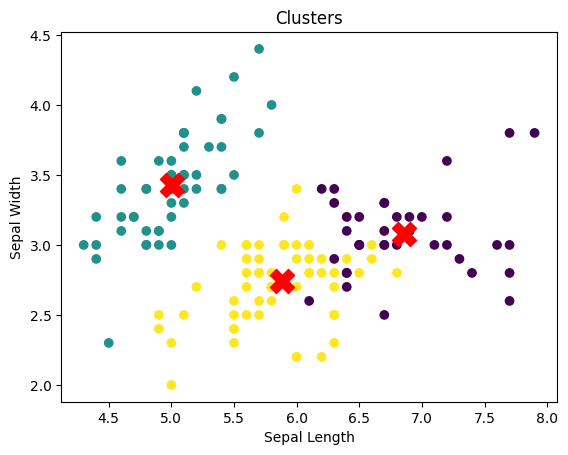

In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

### Explanation:
- We tried different k values (1 to 10).
- WCSS tells us how tight the marbles are in the jar.
- We plot the graph to find the elbow point where adding more clusters does not improve much.

# Silhouette Score Method

### Another way to find the best k is by using **Silhouette Score**.

It tells us how well marbles (points) fit in their jar (cluster).

Higher Silhouette Score means better groups.

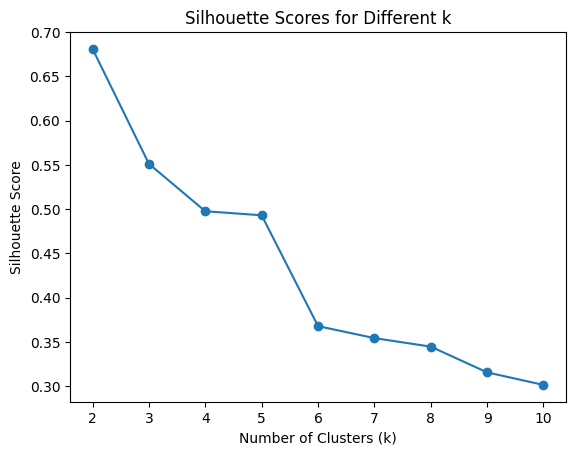

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

### Explanation:
- We check different k values.
- The best k has the highest Silhouette Score.
- This method shows how separate and clear the clusters are.

# 3. Working with Centroids and Iterations

### How does K-Means work step-by-step?
- In each round, the marbles are assigned to their nearest jar.
- The jar’s center moves to the middle of its marbles.
- This repeats until the jars stop moving.

### Example:
It’s like playing a game where you keep moving the jar closer to where most marbles are standing!

# 4. Activity: K-Means on a Real Dataset

### Let’s try K-Means on a customer dataset to find groups of people based on age, income, and spending habits.

In [3]:
import pandas as pd
import numpy as np

# Sample customer data
data = {
    'Age': [19, 21, 20, 23, 31, 40, 35, 52, 55, 60],
    'Annual_Income': [15, 16, 17, 18, 45, 50, 52, 80, 85, 90],
    'Spending_Score': [39, 81, 6, 77, 40, 42, 50, 88, 46, 55]
}

customer_data = pd.DataFrame(data)
X = customer_data[['Age', 'Annual_Income', 'Spending_Score']].values

### Finding the best k using Elbow Method

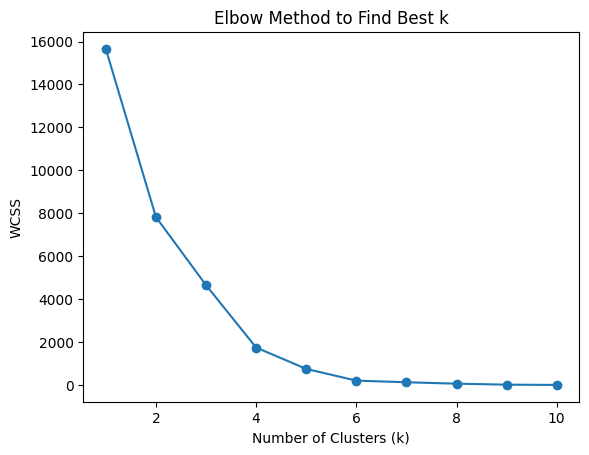

In [4]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Find Best k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

### Let’s assume the best k is 3. Now we will run K-Means and plot the clusters.

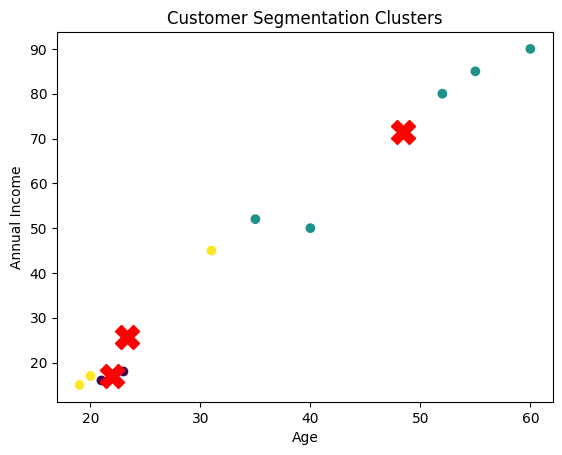

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

### Explanation:
- The points are colored based on which cluster they belong to.
- The red X shows the center of each cluster.
- We grouped the customers based on age and income!

# 5. Discussion & Challenges

### Points to Talk About:
- What patterns can you see in the clusters?
- How does changing k change the grouping?
- Did the Elbow and Silhouette methods agree?

### Challenges:
- Sometimes the elbow is hard to see clearly.
- Different starting points can make different clusters.
- Small datasets may make it harder to choose the best k.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Improved synthetic dataset
np.random.seed(42)

# Group 1: Young, Low income
age1 = np.random.randint(18, 25, 50)
income1 = np.random.randint(15, 25, 50)

# Group 2: Middle-aged, Medium income
age2 = np.random.randint(30, 45, 50)
income2 = np.random.randint(40, 60, 50)

# Group 3: Older, High income
age3 = np.random.randint(50, 65, 50)
income3 = np.random.randint(80, 100, 50)

# Combine data
ages = np.concatenate([age1, age2, age3])
incomes = np.concatenate([income1, income2, income3])
 
customer_data = pd.DataFrame({'Age': ages, 'Annual_Income': incomes})
X = customer_data[['Age', 'Annual_Income']].values

In [7]:
# Calculate WCSS for k from 1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

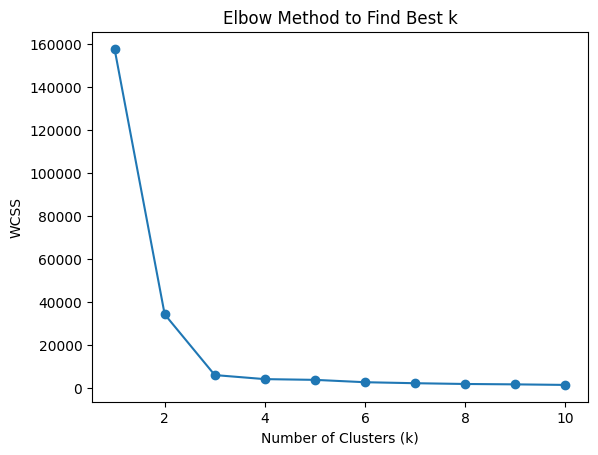

In [8]:
# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Find Best k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

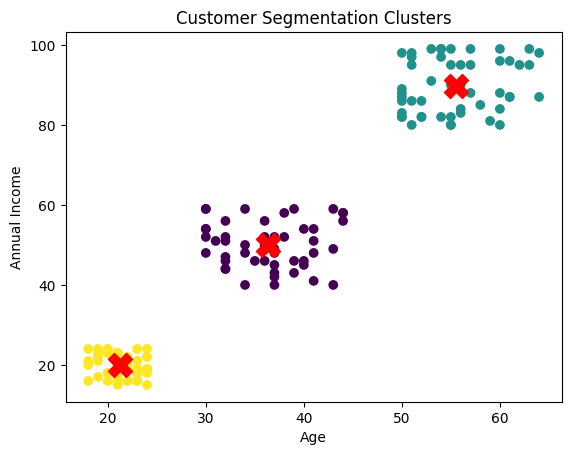

In [ ]:
# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()
